In [ ]:
import requests

def getdata(num,name):

    url='http://20.51.192.43:8080/mobility/getData?offset=0&limit=%d&name=%s' %(num,name)
    res=requests.get(url)

    locationList=[]
    data2=res.json()

    data=data2['content']
    for i in range(len(data)):
        X,y,t=data[i]['latitude'],data[i]['longitude'],data[i]['unixTime']
        lati=float(X)
        long=float(y)
        a=t.split('|')
        t=a[0]
        t=float(t)
        locationList.append([t,lati,long])

    
    return locationList

In [2]:
OMG=getdata(500,'omg')

In [3]:
import numpy as np
data=np.array(OMG)
print(data.shape)
print(data)

(500, 3)
[[1.57517604e+09 3.75438833e+01 1.26951255e+02]
 [1.57517605e+09 3.75438833e+01 1.26951382e+02]
 [1.57517605e+09 3.75437250e+01 1.26951757e+02]
 ...
 [1.57705839e+09 3.75477467e+01 1.26929270e+02]
 [1.57705839e+09 3.75477550e+01 1.26929363e+02]
 [1.57705840e+09 3.75477500e+01 1.26929463e+02]]


In [4]:
#DATA PREPROCESSING
import numpy as np
import math


def Preprocessing(Path):#Trajectory Path Path
    k=len(Path)
    N=math.ceil(k**0.5)
    ProcessedPath=np.zeros(N*N)# N X N matrix
    ProcessedPathSet=np.array([])
    Label=np.array([])
    pre=np.array([])
    
    for j in range(1,k+1):
        for i in range(j):
            ProcessedPath[i]=Path[i]
            pre=np.append(pre,Path[i])
        Label=np.append(Label,pre[-1])
        ProcessedPathSet=np.append(ProcessedPathSet,ProcessedPath)
    Label=np.append(Label,0)
    Label=np.delete(Label,0)
    ProcessedPathSet=np.reshape(ProcessedPathSet,(k,N*N))
    
    return [ProcessedPathSet,Label] # A set of Trajectory ProcessedPathSet ProcessedPathSet, A set of Label label

In [5]:
#predicted path
#input [1,2,3,4,5]
#output [6]
def PredictedPath(Path):#Existing Trajectory Path Path, Desired length of prediction n, Existing Trajectory PredictedPath
    predictedPath=np.append(Path,predictedPath)
    for i in range(len(Path)):
        predictedLabel=np.argmax(model.predict(predictedPath),axis=1)#next location
        predictedPath=np.append(predictedPath,predictedLabel)#observed location+next location
    return predictedPath #Predicted Trajectory PredictedPath

지역나누기

In [6]:
import math

x_min=math.floor(data[:,1].min())
x_max=math.ceil(data[:,1].max())
y_min=math.floor(data[:,2].min())
y_max=math.ceil(data[:,2].max())

split_num=100

#split_num*split_num로 지역 나눔
x_unit=(x_max-x_min)/split_num
y_unit=(y_max-y_min)/split_num

binx=np.arange(x_min,x_max,x_unit)
biny=np.arange(y_min,y_max,y_unit)

x_split=np.digitize(data[:,1],binx)
y_split=np.digitize(data[:,2],biny)

#location labeling
basic_label=np.zeros(split_num*split_num)
for i in range(split_num*split_num):
    basic_label[i]=i+1
label=basic_label.reshape(split_num,split_num)


path=[]
for i in range(len(x_split)):
    x,y=x_split[i],y_split[i]
    path.append(label[x][y])


split_data=[]
for i in range(len(x_split)):
    split_data.append([data[i,1],data[i,2],data[i,0],path[i]])#x,y,time,label

split_data=np.array(split_data)

print(split_data)
#print(split_data.shape)

[[3.75438833e+01 1.26951255e+02 1.57517604e+09 5.54900000e+03]
 [3.75438833e+01 1.26951382e+02 1.57517605e+09 5.54900000e+03]
 [3.75437250e+01 1.26951757e+02 1.57517605e+09 5.54900000e+03]
 ...
 [3.75477467e+01 1.26929270e+02 1.57705839e+09 5.54800000e+03]
 [3.75477550e+01 1.26929363e+02 1.57705839e+09 5.54800000e+03]
 [3.75477500e+01 1.26929463e+02 1.57705840e+09 5.54800000e+03]]


시각화

In [7]:
import matplotlib.pyplot as plt

원래 좌표

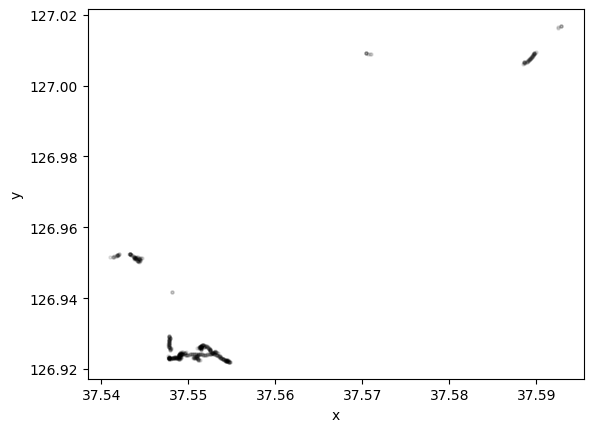

In [8]:
plt.scatter(split_data[:,0],split_data[:,1],
                   c='black', edgecolor='black',alpha=0.1,
                   linewidth=1, marker='o',
                   s=5, label='train set')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

label된 좌표

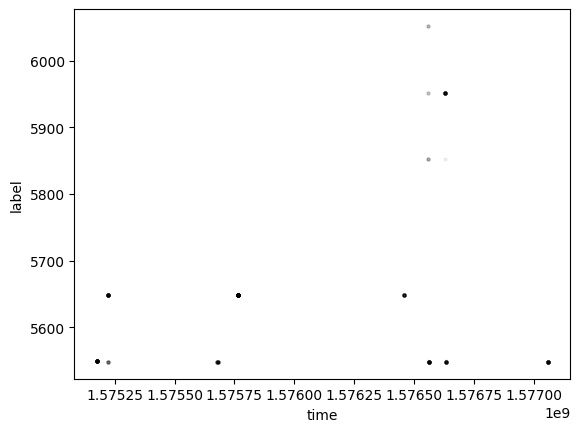

In [9]:
plt.scatter(split_data[:,2],split_data[:,3],
                   c='black', edgecolor='black',alpha=0.05,
                   linewidth=1, marker='o',
                   s=5, label='train set')
plt.xlabel('time')
plt.ylabel('label')
plt.show()

In [10]:
Label_data=Preprocessing(split_data[:,3])

In [11]:
Label_data[0] #Trajectory

array([[5549.,    0.,    0., ...,    0.,    0.,    0.],
       [5549., 5549.,    0., ...,    0.,    0.,    0.],
       [5549., 5549., 5549., ...,    0.,    0.,    0.],
       ...,
       [5549., 5549., 5549., ...,    0.,    0.,    0.],
       [5549., 5549., 5549., ...,    0.,    0.,    0.],
       [5549., 5549., 5549., ...,    0.,    0.,    0.]])

In [12]:
Label_data[1]#label

array([5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5548.,
       5548., 5548., 5548., 5548., 5548., 5548., 5548., 5548., 5548.,
       5548., 5548.,

In [13]:
Label_data[0].shape #23*23=529

(500, 529)

In [14]:
Label_data[1].shape

(500,)

CNN모델 만들기

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(Label_data[0],Label_data[1], test_size=0.2, random_state=42)

In [17]:
print('훈련 세트: ',x_train.shape,y_train.shape)
print('테스트 세트: ',x_test.shape,y_test.shape)

훈련 세트:  (400, 529) (400,)
테스트 세트:  (100, 529) (100,)


one-hot encoding

In [18]:
from tensorflow.keras.utils import to_categorical
y_train_onehot=to_categorical(y_train)
y_test_onehot=to_categorical(y_test)
print(y_train_onehot.shape,y_test_onehot.shape)

(400, 6053) (100, 6053)


In [19]:
x_train_centered=x_train.reshape((-1,23,23,1))
x_test_centered=x_test.reshape((-1,23,23,1))

In [20]:
print('훈련 세트: ',x_train_centered.shape,y_train_onehot.shape)
print('테스트 세트: ',x_test_centered.shape,y_test_onehot.shape)

훈련 세트:  (400, 23, 23, 1) (400, 6053)
테스트 세트:  (100, 23, 23, 1) (100, 6053)


In [21]:
from tensorflow.keras import layers, models

model1

In [22]:
model=models.Sequential()
model.add(layers.Conv2D(32,(5,5),padding='valid',activation='tanh',input_shape=x_train_centered.shape[1:]))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(5,5),padding='valid',activation='tanh'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024,activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6053,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 19, 19, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              263168    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [25]:
history=model.fit(x_train_centered,y_train_onehot,batch_size=64,epochs=20,validation_data=(x_test_centered,y_test_onehot))

Epoch 1/20
7/7 [==============================] - 2s 157ms/step - loss: 5.3466 - acc: 0.4775 - val_loss: 2.2133 - val_acc: 0.6900
Epoch 2/20
7/7 [==============================] - 1s 84ms/step - loss: 1.5479 - acc: 0.5675 - val_loss: 1.1079 - val_acc: 0.6700
Epoch 3/20
7/7 [==============================] - 1s 85ms/step - loss: 0.8240 - acc: 0.7400 - val_loss: 1.0458 - val_acc: 0.6900
Epoch 4/20
7/7 [==============================] - 1s 84ms/step - loss: 0.6530 - acc: 0.7950 - val_loss: 0.6341 - val_acc: 0.7800
Epoch 5/20
7/7 [==============================] - 1s 84ms/step - loss: 0.5651 - acc: 0.8400 - val_loss: 0.5723 - val_acc: 0.7900
Epoch 6/20
7/7 [==============================] - 1s 84ms/step - loss: 0.4783 - acc: 0.8375 - val_loss: 0.6584 - val_acc: 0.7600
Epoch 7/20
7/7 [==============================] - 1s 85ms/step - loss: 0.4584 - acc: 0.8525 - val_loss: 0.5401 - val_acc: 0.7900
Epoch 8/20
7/7 [==============================] - 1s 87ms/step - loss: 0.3883 - acc: 0.8625 - va

In [26]:
epochs=np.arange(1,21)

In [27]:
import matplotlib.pyplot as plt

In [28]:
plt.plot(epochs,history.history['loss'],label='loss')

In [29]:
plt.plot(epochs,history.history['val_loss'],label='val_loss')

In [30]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


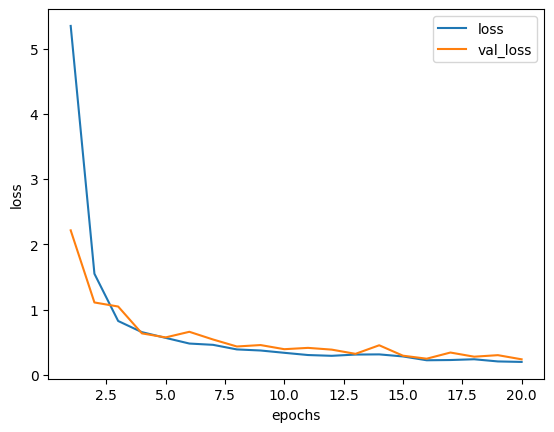

In [31]:
plt.show()

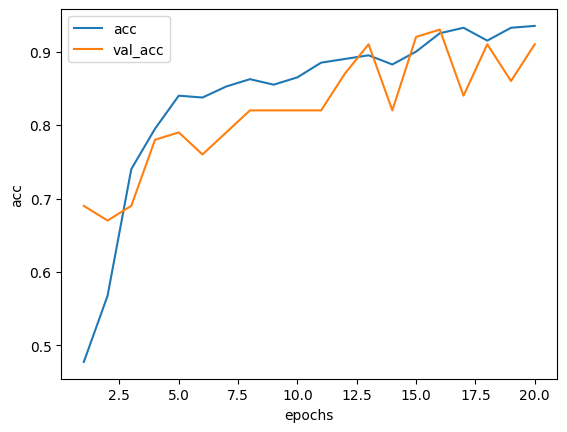

In [32]:
plt.plot(epochs,history.history['acc'],label='acc')
plt.plot(epochs,history.history['val_acc'],label='val_acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

model2

In [33]:

model2=models.Sequential()
model2.add(layers.Conv2D(32,(5,5),padding='valid',activation='tanh',input_shape=x_train_centered.shape[1:]))
model2.add(layers.Conv2D(64,(3,3),padding='valid',activation='tanh'))
model2.add(layers.MaxPool2D(2,2))
model2.add(layers.Flatten())
model2.add(layers.Dense(1024,activation='tanh'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(6053,activation='softmax'))


In [34]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 19, 19, 32)        832       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 6053)             

In [35]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [36]:
history=model2.fit(x_train_centered,y_train_onehot,batch_size=64,epochs=20,validation_data=(x_test_centered,y_test_onehot))

Epoch 1/20
7/7 [==============================] - 2s 173ms/step - loss: 3.3958 - acc: 0.5125 - val_loss: 0.9532 - val_acc: 0.7900
Epoch 2/20
7/7 [==============================] - 1s 133ms/step - loss: 0.6492 - acc: 0.8000 - val_loss: 0.7219 - val_acc: 0.7700
Epoch 3/20
7/7 [==============================] - 1s 135ms/step - loss: 0.4405 - acc: 0.8675 - val_loss: 0.4008 - val_acc: 0.8500
Epoch 4/20
7/7 [==============================] - 1s 134ms/step - loss: 0.3980 - acc: 0.8650 - val_loss: 0.3953 - val_acc: 0.8400
Epoch 5/20
7/7 [==============================] - 1s 135ms/step - loss: 0.3581 - acc: 0.8500 - val_loss: 0.4028 - val_acc: 0.9100
Epoch 6/20
7/7 [==============================] - 1s 138ms/step - loss: 0.3356 - acc: 0.8875 - val_loss: 0.3235 - val_acc: 0.8500
Epoch 7/20
7/7 [==============================] - 1s 138ms/step - loss: 0.2744 - acc: 0.9150 - val_loss: 0.2901 - val_acc: 0.9200
Epoch 8/20
7/7 [==============================] - 1s 138ms/step - loss: 0.2518 - acc: 0.91

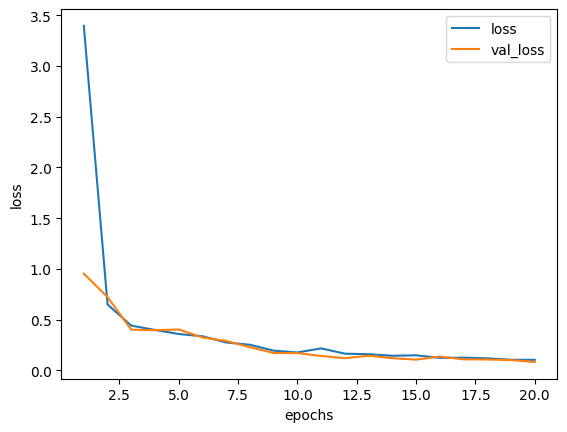

In [37]:

epochs=np.arange(1,21)
plt.plot(epochs,history.history['loss'],label='loss')
plt.plot(epochs,history.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


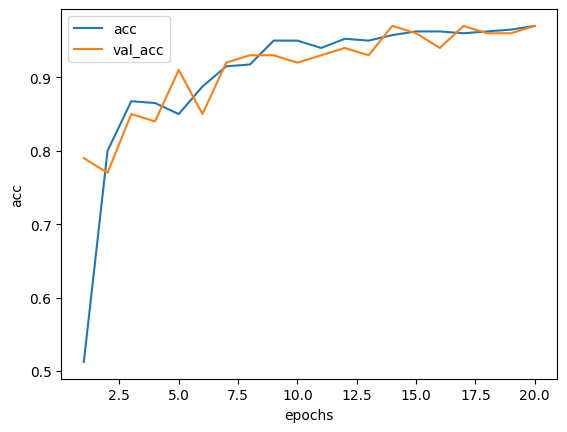

In [38]:

plt.plot(epochs,history.history['acc'],label='acc')
plt.plot(epochs,history.history['val_acc'],label='val_acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()


model3

In [39]:

model3=models.Sequential()
model3.add(layers.Conv2D(32,(5,5),padding='valid',activation='tanh',input_shape=x_train_centered.shape[1:]))
model3.add(layers.Conv2D(64,(5,5),padding='valid',activation='tanh'))
model3.add(layers.MaxPool2D(2,2))
model3.add(layers.Flatten())
model3.add(layers.Dense(1024,activation='tanh'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(6053,activation='softmax'))


In [40]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 19, 19, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 6053)             

In [41]:
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [42]:
history=model3.fit(x_train_centered,y_train_onehot,batch_size=64,epochs=20,validation_data=(x_test_centered,y_test_onehot))

Epoch 1/20
7/7 [==============================] - 2s 196ms/step - loss: 3.3037 - acc: 0.6000 - val_loss: 1.0624 - val_acc: 0.8200
Epoch 2/20
7/7 [==============================] - 1s 153ms/step - loss: 0.6736 - acc: 0.8000 - val_loss: 0.7893 - val_acc: 0.7600
Epoch 3/20
7/7 [==============================] - 1s 155ms/step - loss: 0.4925 - acc: 0.8550 - val_loss: 0.5263 - val_acc: 0.8100
Epoch 4/20
7/7 [==============================] - 1s 153ms/step - loss: 0.4988 - acc: 0.7800 - val_loss: 0.4550 - val_acc: 0.8100
Epoch 5/20
7/7 [==============================] - 1s 157ms/step - loss: 0.3895 - acc: 0.8625 - val_loss: 0.3758 - val_acc: 0.8500
Epoch 6/20
7/7 [==============================] - 1s 153ms/step - loss: 0.3748 - acc: 0.8700 - val_loss: 0.4103 - val_acc: 0.8300
Epoch 7/20
7/7 [==============================] - 1s 152ms/step - loss: 0.3423 - acc: 0.8750 - val_loss: 0.3755 - val_acc: 0.8300
Epoch 8/20
7/7 [==============================] - 1s 151ms/step - loss: 0.3303 - acc: 0.89

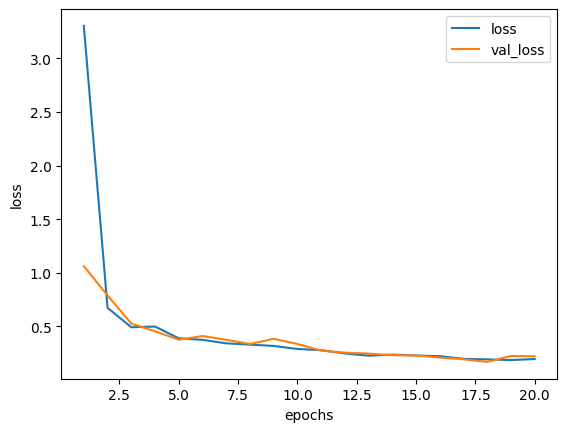

In [43]:

epochs=np.arange(1,21)
plt.plot(epochs,history.history['loss'],label='loss')
plt.plot(epochs,history.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


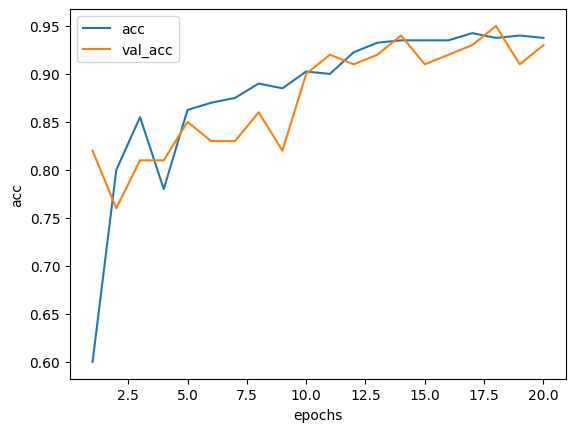

In [44]:

plt.plot(epochs,history.history['acc'],label='acc')
plt.plot(epochs,history.history['val_acc'],label='val_acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()


복원

In [45]:
first_layer=model3.layers[0]

In [46]:
print(first_layer)
print(model3.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 23, 23, 1), dtype=tf.float32, name='conv2d_4_input'), name='conv2d_4_input', description="created by layer 'conv2d_4_input'")


In [47]:
first_activation=models.Model(inputs=model3.input,outputs=first_layer.output)
activation=first_activation.predict(x_test_centered[:])

In [48]:
print(activation.shape)

(100, 19, 19, 32)


In [49]:
fig=plt.figure(figsize=(10,15))

In [50]:
for i in range(32):
    fig.add_subplot(8,4,i+1)
    plt.imshow(activation[0,:,:,i])

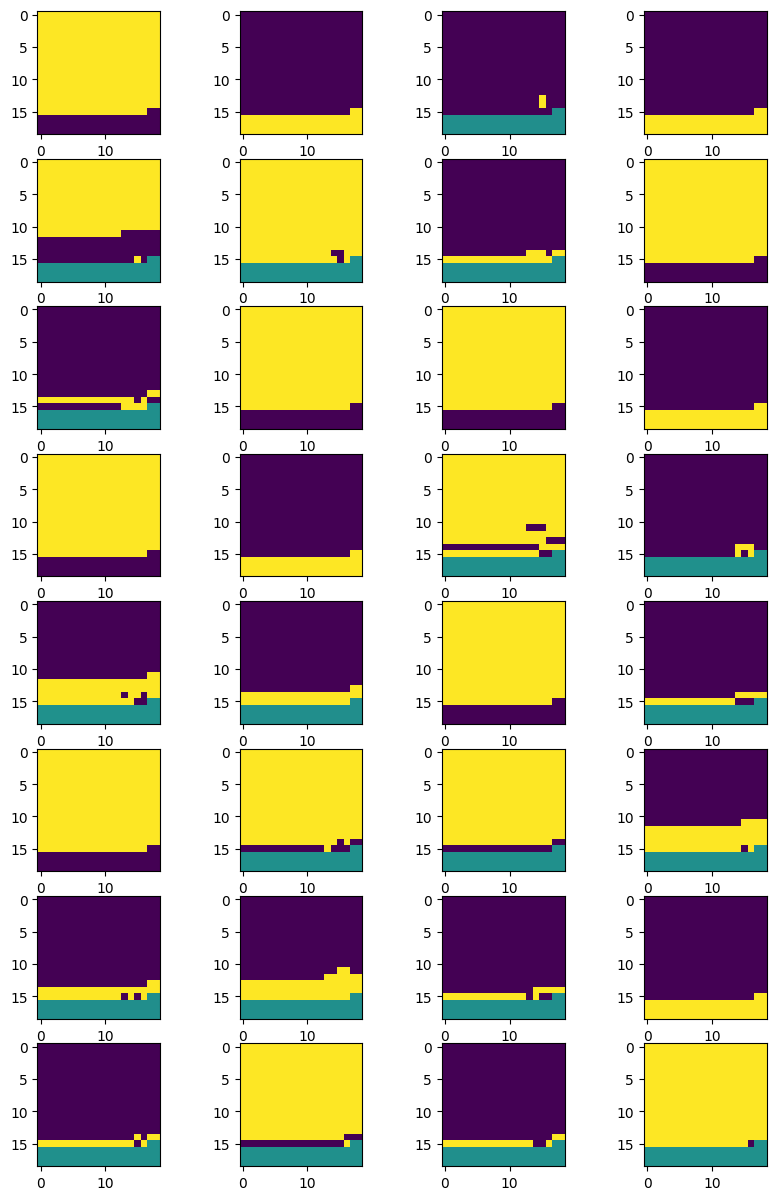

In [51]:
plt.show()

In [52]:
fig=plt.figure(figsize=(10,15))
for i in range(32):
    fig.add_subplot(6,6,i+1)
    plt.imshow(activation[:,:,0,i])

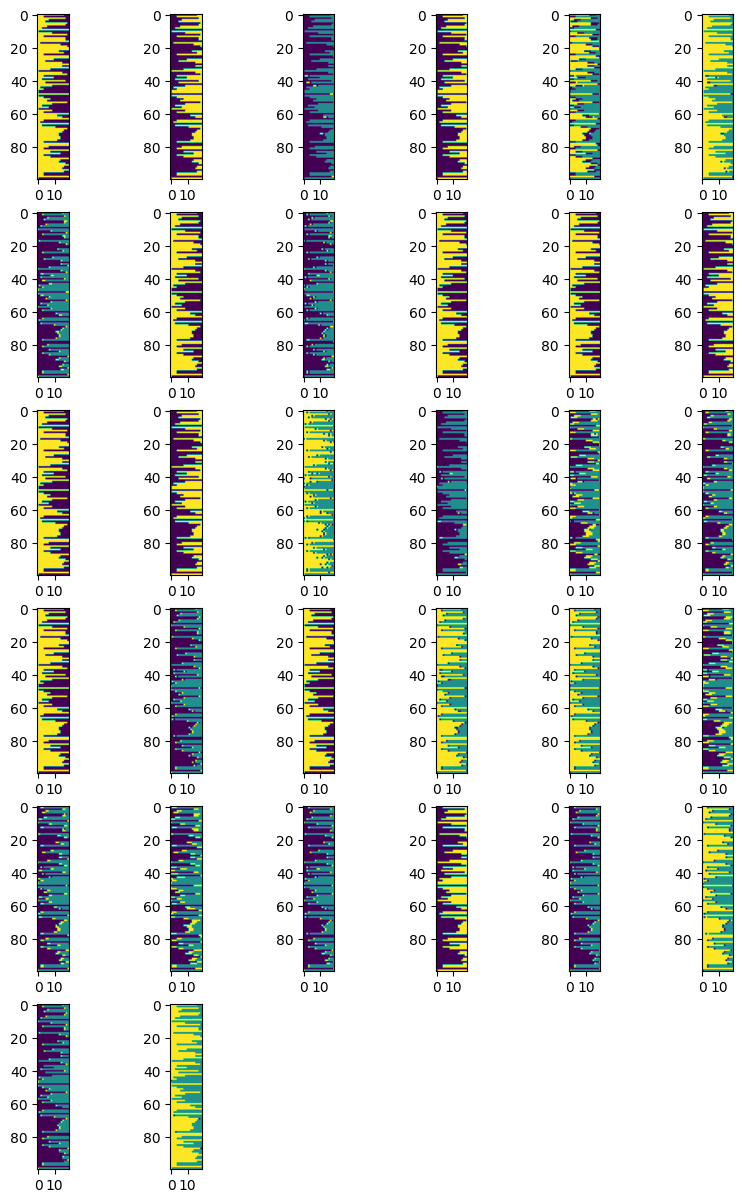

In [53]:
plt.show()

예측값과 실제값 비교

In [54]:
y_predict=np.argmax(model3.predict(x_test_centered),axis=1)
y_predict

array([5548, 5648, 5548, 5548, 5648, 5952, 5548, 5548, 5549, 5548, 5549,
       5648, 5952, 5648, 5548, 5952, 5548, 5549, 5648, 5952, 5548, 5548,
       5648, 5548, 5648, 5548, 5548, 5648, 5648, 5548, 5548, 5548, 5548,
       5648, 5549, 5548, 5952, 5549, 5648, 5549, 5548, 5648, 5548, 5648,
       5549, 5648, 5549, 5549, 5952, 5549, 5648, 5648, 5548, 5952, 5648,
       5549, 5548, 5549, 5648, 5648, 5548, 5648, 5648, 5548, 5648, 5549,
       5548, 5549, 5648, 5952, 5548, 5548, 5648, 5648, 5648, 5648, 5648,
       5549, 5548, 5548, 5548, 5648, 5548, 5648, 5648, 5648, 5648, 5952,
       5648, 5648, 5548, 5548, 5548, 5648, 5548, 5548, 5648, 5648, 5548,
       5549], dtype=int64)

In [55]:
y_test


array([5548., 5648., 5548., 5548., 5648., 5952., 5548., 5548., 5648.,
       5548., 5549., 5648., 5952., 5648., 5548., 5952., 5548., 5549.,
       5648., 5952., 5548., 5548., 5648., 5548., 5648., 5548., 5548.,
       5648., 5648., 5852., 5548., 5852., 5548., 5648., 5549., 5852.,
       5952., 5648., 5648., 5549., 5548., 5648., 5548., 5648., 5549.,
       5648., 5549., 5549., 5952., 5549., 5648., 5648., 5548., 5952.,
       5648., 5549., 5548., 5549., 5648., 5648., 5548., 5648., 5648.,
       5548., 5648., 5549., 5548., 5549., 5648., 5952., 5548., 5548.,
       5648., 5648., 5648., 5648., 5648., 5648., 5548., 5548., 5548.,
       5648., 5548., 5648., 5648., 5648., 5648., 5952., 5648., 5648.,
       5548., 5548., 5548., 6052., 5548., 5548., 5648., 5648., 5548.,
       5549.])

In [56]:
x_test

array([[5549., 5549., 5549., ...,    0.,    0.,    0.],
       [5549., 5549., 5549., ...,    0.,    0.,    0.],
       [5549., 5549., 5549., ...,    0.,    0.,    0.],
       ...,
       [5549., 5549., 5549., ...,    0.,    0.,    0.],
       [5549., 5549., 5549., ...,    0.,    0.,    0.],
       [5549., 5549., 5549., ...,    0.,    0.,    0.]])

예측값+경로

In [57]:
path_all=[]

for i in range(len(x_test)):
    line=np.array([])
    line=np.append(x_test[i],y_predict[i])
    path_all.append(line)
print(path_all)

[array([5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5548., 5548., 5548., 5548., 5548., 5548., 5548., 5548., 5548.,
       5548., 5548.

In [58]:
path_test=[]

for i in range(len(x_test)):
    line=np.array([])
    line=np.append(x_test[i],y_test[i])
    path_test.append(line)
print(path_test)

[array([5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648., 5648.,
       5548., 5548., 5548., 5548., 5548., 5548., 5548., 5548., 5548.,
       5548., 5548.

In [59]:
x=range(1,531)
plt.scatter(x,path_all[8],
                   c='red', edgecolor='grey',alpha=0.5,
                   linewidth=1, marker='o',
                   s=10, label='train set')

plt.scatter(x,path_test[8],
                   c='black', edgecolor='grey',alpha=0.5,
                   linewidth=1, marker='o',
                   s=10, label='train set')


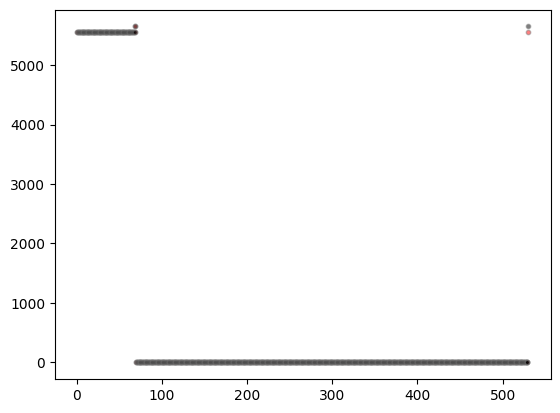

In [60]:
plt.show()

In [61]:
x=range(1,531)
plt.scatter(x,path_all[0],
                   c='red', edgecolor='grey',alpha=0.5,
                   linewidth=1, marker='o',
                   s=10, label='train set')

plt.scatter(x,path_test[0],
                   c='black', edgecolor='grey',alpha=0.5,
                   linewidth=1, marker='o',
                   s=10, label='train set')

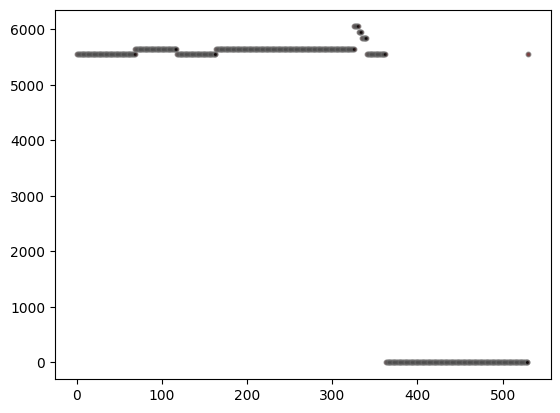

In [62]:
plt.show()

In [63]:
fig=plt.figure(figsize=(100,50))

In [64]:
fig=plt.figure(figsize=(100,50))
for i in range(20):
    fig.add_subplot(4,5,i+1)
    plt.imshow(x_test_centered[i].reshape(23,23))

<Figure size 10000x5000 with 0 Axes>

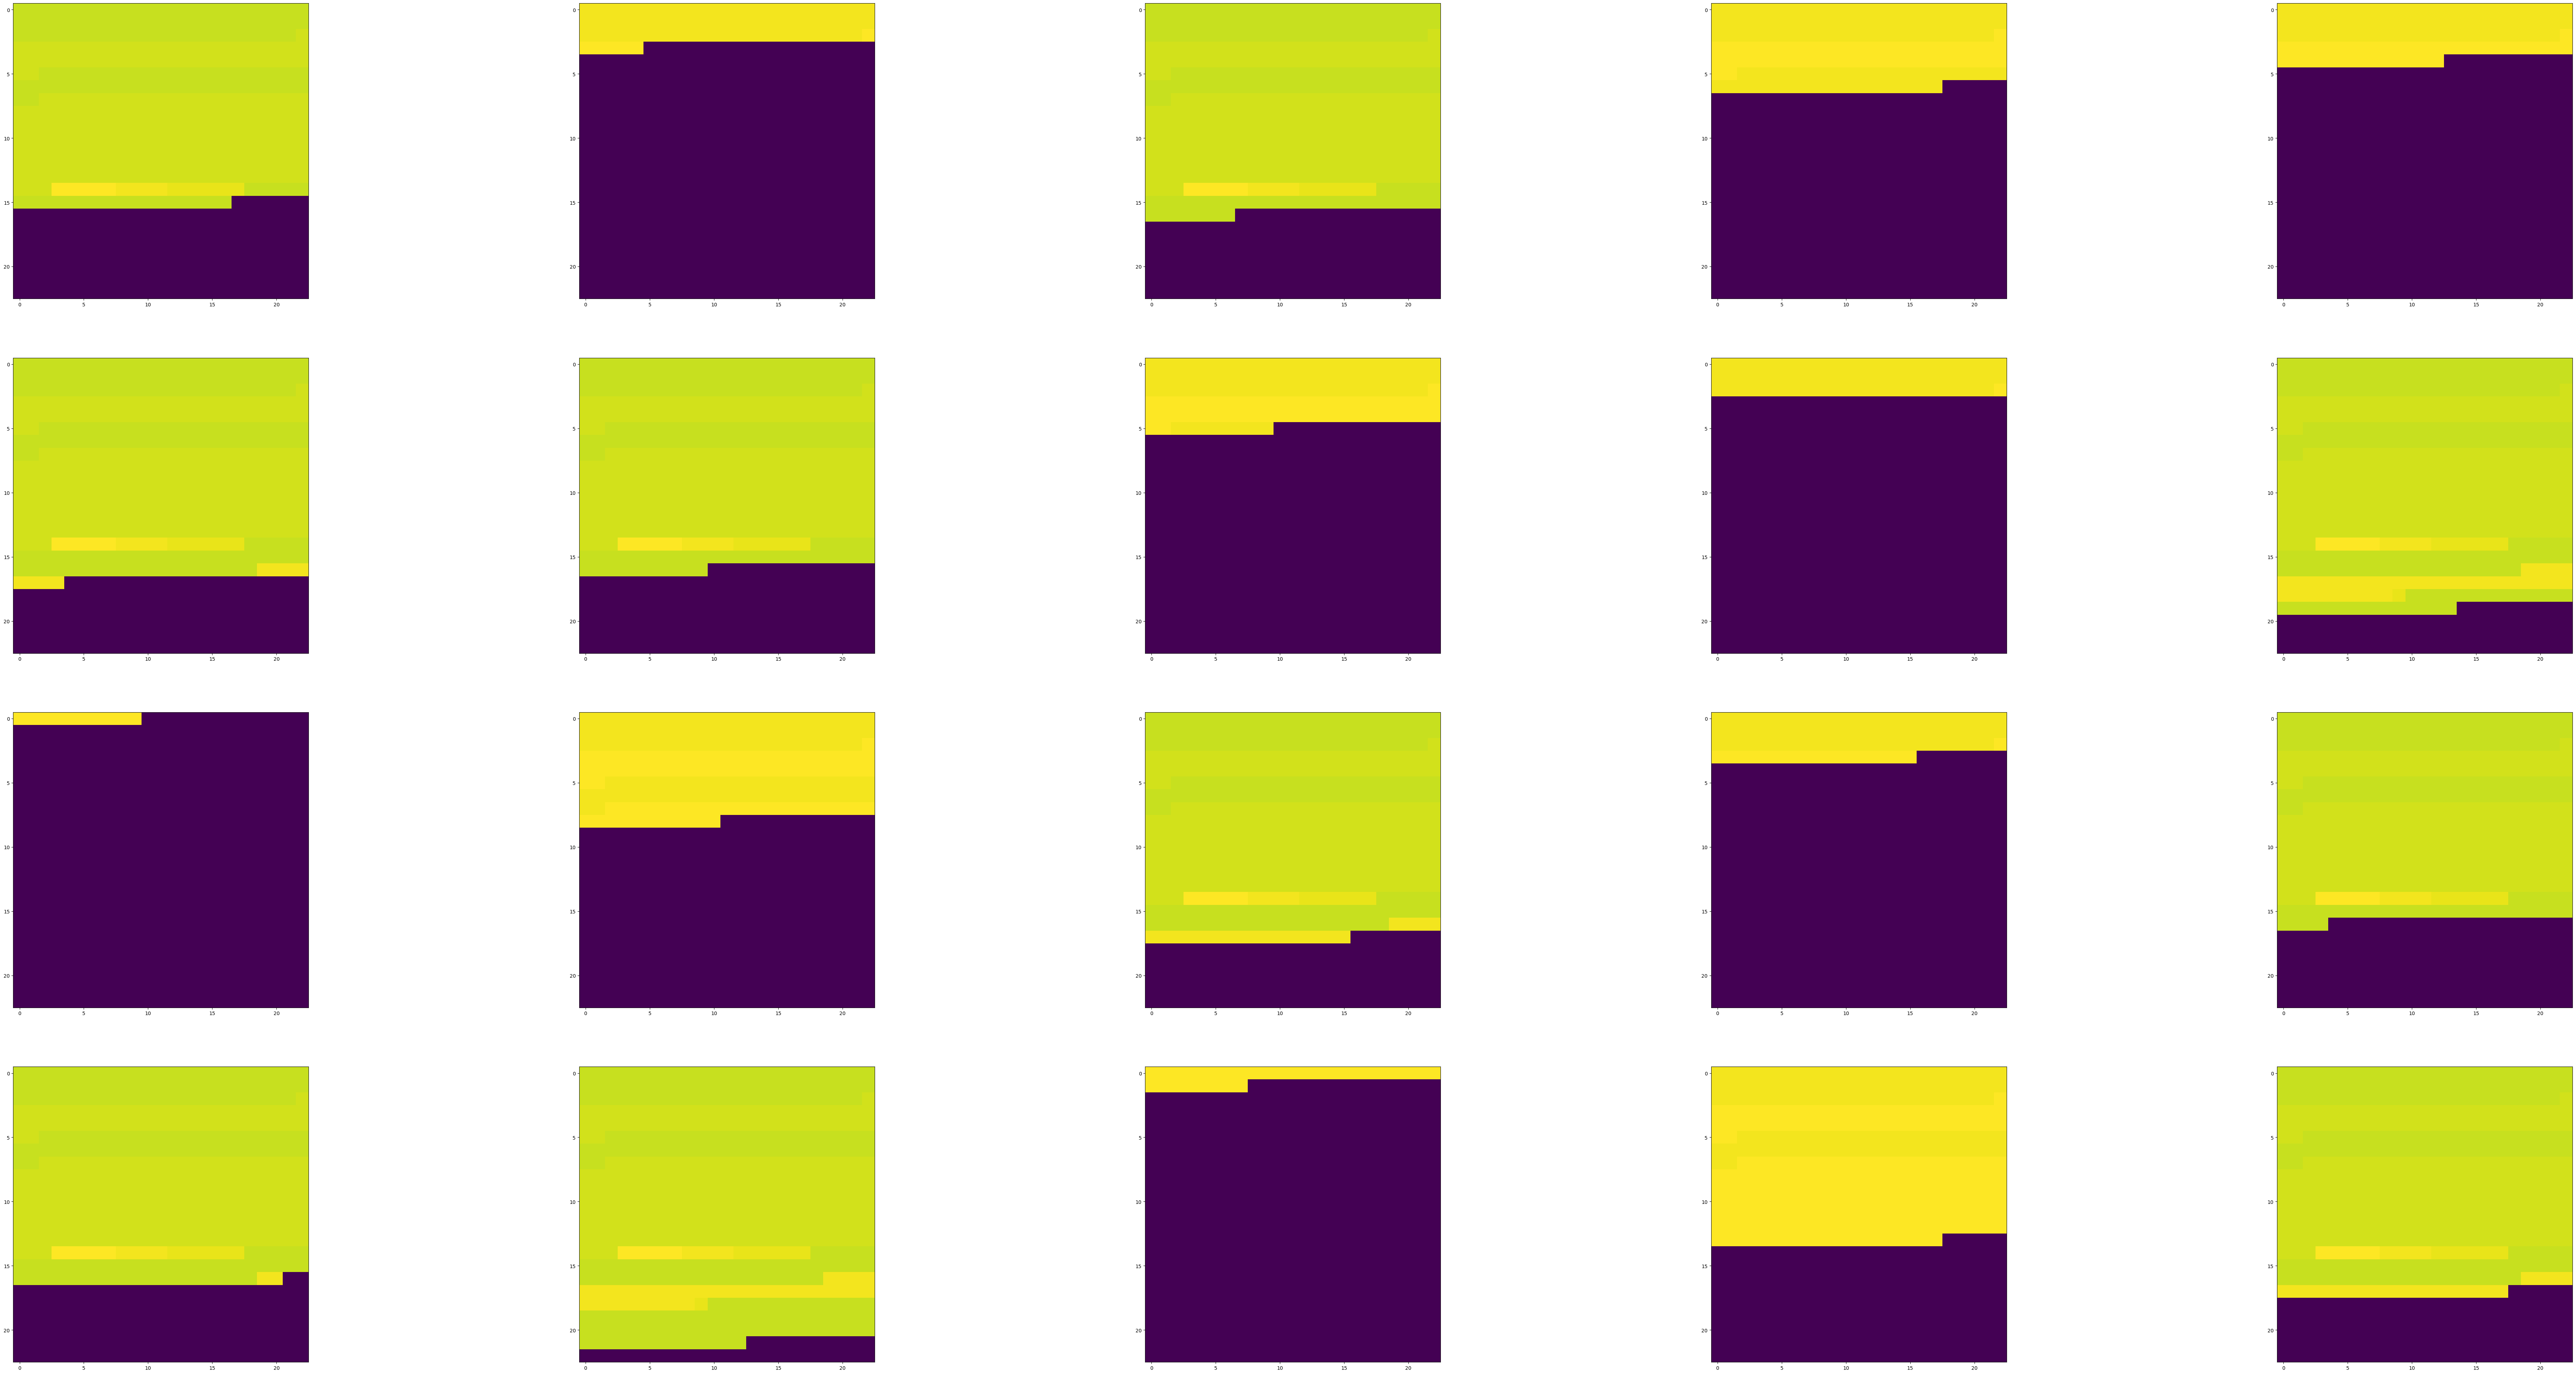

In [65]:
plt.show()#보라색 0, 밝은 곳이 높은 값

In [66]:
x=range(1,101)

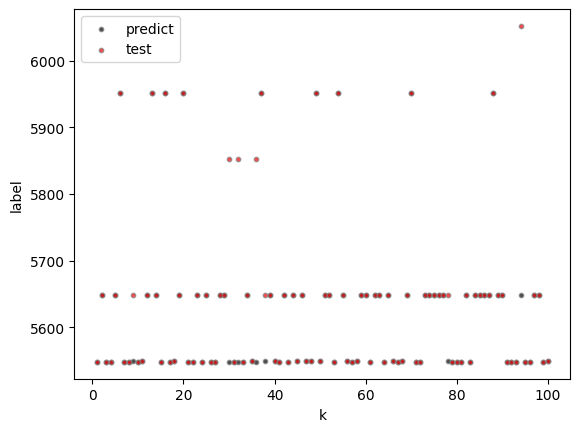

In [67]:
plt.scatter(x,y_predict[:100],
                   c='black', edgecolor='grey',alpha=0.7,
                   linewidth=1, marker='o',
                   s=10, label='predict')
plt.scatter(x,y_test[:100],
                   c='red', edgecolor='grey',alpha=0.7,
                   linewidth=1, marker='o',
                   s=10, label='test')
plt.xlabel('k')
plt.ylabel('label')
plt.legend()
plt.show()

In [68]:
count=0
for i in range(100):
    if y_test[i]==y_predict[i]:
        count=count+1
    
acc=count/100
print(acc)

0.93


In [69]:
model.predict(x_test_centered[:100])

array([[4.9319346e-03, 1.2013567e-08, 2.1877966e-08, ..., 2.4569692e-08,
        3.2933361e-08, 2.0486417e-03],
       [2.1000418e-05, 1.5711135e-09, 1.6398214e-09, ..., 2.7020721e-09,
        1.6156396e-09, 1.1173524e-03],
       [5.1821223e-03, 1.2952352e-08, 2.3548170e-08, ..., 2.6703120e-08,
        3.5690423e-08, 2.1208783e-03],
       ...,
       [1.0442800e-05, 6.0900801e-10, 6.2535455e-10, ..., 1.0759399e-09,
        5.5095312e-10, 6.4025167e-04],
       [9.0505183e-03, 7.9648457e-09, 1.9679407e-08, ..., 1.5768244e-08,
        2.7871240e-08, 3.7727054e-04],
       [5.6978552e-06, 4.8567839e-09, 4.5540407e-09, ..., 6.7787735e-09,
        4.7616275e-09, 9.7905511e-05]], dtype=float32)

In [70]:
path_all[8]

array([5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5648.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [88]:
a=np.array([0])
c = np.setdiff1d(path_all[8],a)
print(c)

[5549. 5648.]


In [84]:
path_new

array([5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549., 5549.,
       5549., 5549., 5549., 5549., 5648.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [106]:
new=np.array([])
new1=np.array([])

for i in range(len(path_all[1])):
    if path_all[1][i]>0:
        a=path_all[1][i]
        new=np.append(new,a)
        
for i in range(len(path_all[1])):
    if path_all[1][i]>0:
        a=path_all[1][i]
        new1=np.append(new1,a)
        

In [107]:
len(new)

75

In [115]:
plt.scatter(x,new,
                   c='black', edgecolor='grey',alpha=0.7,
                   linewidth=1, marker='o',
                   s=10, label='predict')
plt.scatter(x,new1,
                   c='red', edgecolor='grey',alpha=0.7,
                   linewidth=1, marker='o',
                   s=10, label='test')
plt.xlabel('k')
plt.ylabel('label')
plt.legend()
plt.show()



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
